In [1]:
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import pandas as pd
import numpy as np
import cartopy as cartopy
import os as os

%matplotlib inline

In [2]:
df = pd.read_csv('data\\scatter_dummy_data.csv')

In [3]:
df.head()

,day,device_fk_id,n_trip_on,start_lat,start_lon
0,16-03-2020,2565,21068,20.356319,73.868538
1,17-03-2020,3342,2971,26.604467,82.274284
2,26-03-2020,5488,416,28.788904,77.391380
3,25-03-2020,3443,13126,29.526400,78.388046
4,27-02-2020,5442,140,23.543892,76.867691


In [4]:
df['day'] = pd.to_datetime(df['day'],format="%d-%m-%Y")

findfont: Font family ['Open Sans'] not found. Falling back to DejaVu Sans.


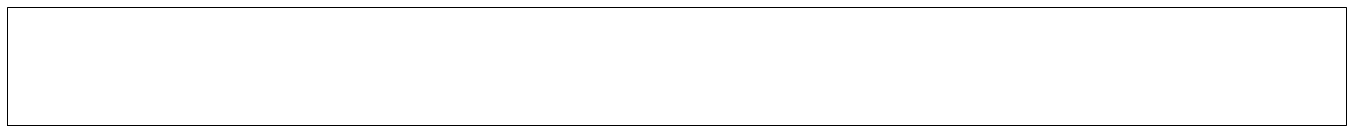

In [5]:
central_lat = 37.5
central_lon = -96
extent = [68.1941, 97.39564, 8.06890, 37.08586]
central_lon = np.mean(extent[:2])
central_lat = np.mean(extent[2:])
os.environ["CARTOPY_USER_BACKGROUNDS"] = "C:\\Users\\Yash\\Downloads\\CARTOPY_IMGS"

fig = plt.figure(figsize=(24, 12))
ax = plt.axes(projection=ccrs.Mercator(central_lon, 8.06890, 37.08586))
for i in range(1,30):
    date = datetime(2020,3,i)
    df_single_day = df[df['day'] == date]
    if ax is None:
        fig = plt.figure(figsize=(24, 12))
        ax = plt.axes(projection=ccrs.Mercator(central_lon, 8.06890, 37.08586))
    ax.set_extent(extent, crs=ccrs.PlateCarree())

    ax.background_img(extent = extent)
    ax.scatter(df_single_day['start_lon'], df_single_day['start_lat'], s=df_single_day['n_trip_on'].apply(lambda x: x/100),
                   alpha=0.8, color='#FFFF50',
                   transform=ccrs.PlateCarree())

    fontname = 'Open Sans'
    fontsize = 28
    # Positions for the date and grad counter
    date_x = 85
    date_y = 10
    date_spacing = 65

    ax.text(date_x, date_y, 
            f"{date.strftime('%b %d, %Y')}", 
            color='white',
            fontname=fontname, fontsize=fontsize*1.3,
            transform=ccrs.PlateCarree())

    fig.savefig(f"frames_cartopy/frame_{i:02d}.png", dpi=100,facecolor='black', bbox_inches='tight')
    ax.clear()

In [6]:
#Now that the images have been saved, it is time to stitch them into a video. 
#Open command prompt and navigate to the frames_cartopy folder
#Execute the following command to generate a video:
# >ffmpeg -framerate 3 -i frame_%3d.png -c:v h264 -r 30 -s 1920x1080 ./cartopy_video.mp4

#To learn more about the different attributes of ffmpeg, see https://trac.ffmpeg.org/wiki/Slideshow